In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sklearn

In [5]:
from sklearn import datasets

In [6]:
diabetes = datasets.load_diabetes()

In [7]:
print('The full data matrix has shape', diabetes.data.shape)

The full data matrix has shape (442, 10)


In [8]:
print('Dimension of the feature vector', diabetes.feature_names)

Dimension of the feature vector ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [9]:
print('Dimension of the target value', diabetes.target.shape)

Dimension of the target value (442,)


In [10]:
count=1

In [11]:
fig=plt.figure(figsize=(15, 10), dpi=80)

<Figure size 1200x800 with 0 Axes>

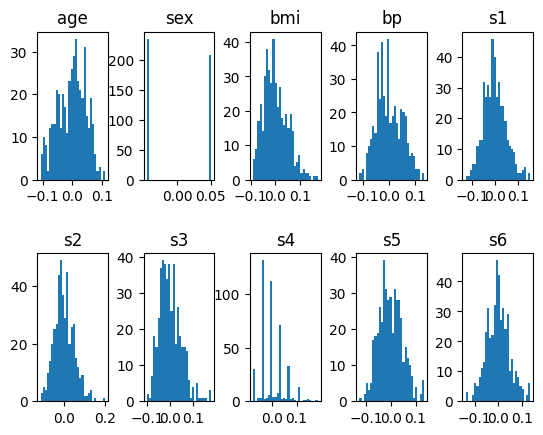

In [12]:
for i in range(diabetes.data.shape[1]):
    plt.subplot(2,5, count)
    plt.hist(diabetes.data[:, i], bins=30)
    plt.title(diabetes.feature_names[i])
    count+=1

plt.subplots_adjust(hspace=0.5, wspace=0.5)  # サブプロット間の間隔を調整
fig.tight_layout(pad=0.4)
plt.show()

In [13]:
X = diabetes.data[:, np.newaxis, 2]
# X = diabetes.data[:, 2:3]

### X = diabetes.data[:, np.newaxis, 2]:
- このコードは、データセットから3番目の特徴量（インデックスは2）を取り出し、それを X に割り当てています。
- np.newaxis は、選択されたデータに新しい次元を追加します。
    - これにより、単一の特徴量を持つデータが2次元配列として形成されます（例えば、(442,)から(442, 1)へ変換されます）。
- これは、scikit-learnの多くのモデルが特徴量の配列として2次元配列を期待するために必要です。
### X = diabetes.data[:, 2:3]:
- このコードも同じ特徴量（BMI）を選択していますが、np.newaxis を使用する代わりにスライスを使っています。
- 2:3 はインデックス2から3未満までの要素を取り出し（実際にはインデックス2のみ）、結果として2次元配列を作成します。
- こちらも結果は X に割り当てられます。


In [14]:
y = diabetes.target

In [15]:
print('Dimension of the feature matrix', X.shape)

Dimension of the feature matrix (442, 1)


In [16]:
print('Dimension of the target value', y.shape)

Dimension of the target value (442,)


In [17]:
def naive_split_data(X, y, split_index):
    X_train = X[:-split_index]
    X_test = X[-split_index:]
    y_train = y[:-split_index]
    y_test = y[-split_index:]
    return X_train, X_test, y_train, y_test

- 引数:
    - X: 特徴データ
    - y: ターゲットデータ（目的変数）
    - split_index: どのインデックスでデータを分割するか
- 処理内容:
    - X と y はそれぞれ指定されたインデックスで訓練データとテストデータに分割されます。
- 戻り値:
    - 訓練データおよびテストデータの組 (X_train, X_test, y_train, y_test)

In [18]:
def split_data(data, target, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data[train_indices,:], data[test_indices,:], target[train_indices], target[test_indices]

- 引数
    - data: 特徴データ
    - target: ターゲットデータ
    - test_ratio: テストデータの比率 (0から1の間の実数)
- 処理内容:
    - データをランダムにシャッフルします。
    - シャッフルしたデータを指定された比率で訓練データとテストデータに分割します。
- 戻り値:
    - 訓練データおよびテストデータの組

In [19]:
X_train, X_test, y_train, y_test = naive_split_data(X, y, 8)

- 44番目のインデックスでデータを分割しています。

In [20]:
print('Naive Split')
print('X train', X_train.shape)
print('X test',X_test.shape)
print('y train',y_train.shape)
print('y test',y_test.shape)

Naive Split
X train (434, 1)
X test (8, 1)
y train (434,)
y test (8,)


In [21]:
X_train, X_test, y_train, y_test = split_data(X,y,0.1)

- 全データの10%をテストデータとしてランダムに選び、残りの90%を訓練データとしています。

In [22]:
print('Less Naive Split')
#check the resultant sizes
print('X train', X_train.shape)
print('X test',X_test.shape)
print('y train',y_train.shape)
print('y test',y_test.shape)

Less Naive Split
X train (398, 1)
X test (44, 1)
y train (398,)
y test (44,)


In [23]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [24]:
regr.fit(X_train, y_train)

LinearRegression()

In [25]:
print('Coefficients: \n', regr.coef_) # 係数
print('Intercept: \n', regr.intercept_) #　切片（数学）

Coefficients: 
 [927.93248495]
Intercept: 
 153.89351534145158


In [26]:
y_pred = regr.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 3277.29
Variance score: 0.38


### Mean squared error : 平均二乗誤差（Mean Squared Error, MSE）
これは予測値と実際の値との差（誤差）を二乗したものの平均を表します。MSEは、モデルの予測がどれだけ実際のデータポイントから離れているかを数値化します。値が低いほど、モデルの予測が実際のデータに近いことを意味し、良いモデルの指標とされます。

### Variance score : 決定係数（R²スコアまたはR-squared）
これは回帰モデルがデータのバリエーションをどれだけ説明できているかを測る指標で、0から1の間の値を取ります。1に近いほどモデルがデータによくフィットしていることを意味し、0に近いほどフィットしていないことを意味します。R²スコアは、モデルがデータの全バリエーションに対して、どれだけの割合を説明しているかを示します。

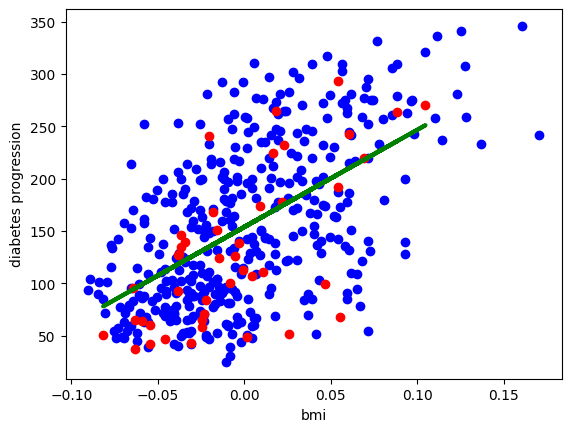

In [28]:
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='green', linewidth=3)
plt.xlabel('bmi')
plt.ylabel('diabetes progression')
plt.show()

## 失敗👇

In [29]:
# # step1 データセットを訓練データとテストデータに分割するコードを作成

# from sklearn.model_selection import train_test_split

In [30]:
# X = diabetes.data   # 特徴量
# y = diabetes.target # ターゲット変数

In [31]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### test_size
- テストデータの数は、データを分割する際に `train_test_split` 関数に設定された `test_size` パラメータによって決定されます。
- `test_size` は 0.2 に設定されていました。
    - これは、利用可能なデータセットの20%をテストセットとして使用することを意味します。

### random_state
- `train_test_split` 関数の `random_state` パラメータは、分割時のデータのシャッフルを制御するために使われます。このパラメータに特定の整数値を設定することで、関数の呼び出し結果の再現性を保証することができます。

- 具体的には、`random_state` に同じ値を設定すると、関数を複数回実行しても、毎回同じ方法でデータがシャッフルされ、同じトレーニングセットとテストセットが生成されます。これにより、異なる実験やモデルトレーニングで一貫した結果を得ることが可能になり、実験の比較が公平になります。

- `random_state` を設定しない場合、`train_test_split` は毎回異なるランダムシードを使用してデータをシャッフルするため、結果の再現性は保証されません。

- `random_state=42` と設定することは、機械学習のコミュニティで一般的な慣習であり、特に理由がない限り42という数字を使うことがよくあります。これは、ランダムシードとして特に何か優れているわけではなく、単に「宇宙と人生の究極の疑問の答え」として知られる数字（ダグラス・アダムスの『銀河ヒッチハイク・ガイド』におけるジョーク）を使っているだけです。

In [32]:
# (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [33]:
# X_train_subset = X_train[:20, :1]
# y_train_subset = y_train[:20]

In [34]:
# regr.fit(X_train_subset, y_train_subset)

In [35]:
# X_test_subset = X_test[:, :1]
# test_score = regr.score(X_test_subset, y_test)

In [36]:
# test_score

In [37]:
# # 訓練データセットのサイズを段階的に増やしながらモデルのパフォーマンスを記録する
# train_sizes = np.linspace(1, X_train.shape[0], 20).astype(int)  # 訓練データのサイズの配列
# test_scores = []  # テストスコアを記録するリスト

In [38]:
# ## 訓練データのサイズごとにモデルをトレーニングし、テストスコアを記録
# for size in train_sizes:
#     # 訓練データのサブセット
#     X_train_subset = X_train[:size, :1]  # 特徴量の選択
#                                            # bmiを選択する場合は, [:size, 2:3]と記述する
#     y_train_subset = y_train[:size]
    
#     # モデルをトレーニング
#     regr.fit(X_train_subset, y_train_subset)
    
#     # テストスコアを計算してリストに追加
#     test_scores.append(regr.score(X_test_subset, y_test))

# # 訓練データのサイズと対応するテストスコア
# train_sizes, test_scores

In [39]:
# plt.figure(figsize=(10, 6))
# plt.plot(train_sizes, test_scores, marker='o', linestyle='-', color='green')